In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train_n = 1024
X_train = X_train[:train_n,:,:]
X_test = X_test[:train_n,:,:]
y_train = y_train[:train_n]
y_test = y_test[:train_n]

print(y_train.shape)

X_train = np.transpose(X_train.reshape(X_train.shape[0], 784)/255)
print(X_train.shape)
X_test = np.transpose(X_test.reshape(X_test.shape[0], 784)/255)
print(X_test.shape)

(1024,)
(784, 1024)
(784, 1024)


In [ ]:
# 0-9 Conversion to ASCII #
dict = {0: 48, 1: 49, 2: 50, 3: 51, 4: 52, 5: 53, 6: 54, 7: 55, 8: 56, 9: 57}

y_train_ascii = np.array([dict[i] for i in y_train], dtype=np.uint8)
y_test_ascii = np.array([dict[i] for i in y_test], dtype=np.uint8)

y_train_ascii_bin = np.zeros((1024,8))
y_test_ascii_bin = np.zeros((1024,8))

#convert from ascii character codes to binary
count=0
for y in y_train_ascii:
  y_train_ascii_bin[count] = np.unpackbits(y)
  count+=1

count=0
for z in y_test_ascii:
  y_test_ascii_bin[count] = np.unpackbits(z)
  count+=1

y_train_ascii_bin = np.transpose(y_train_ascii_bin)
print(y_train_ascii_bin)
y_test_ascii_bin = np.transpose(y_test_ascii_bin)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]]


In [ ]:
X = X_train
Y = y_train_ascii_bin
Ni = 784;
Nh=100;
No=8;
Ntrails = 1000
alpha = 0.01
Lambda = 0
n=train_n

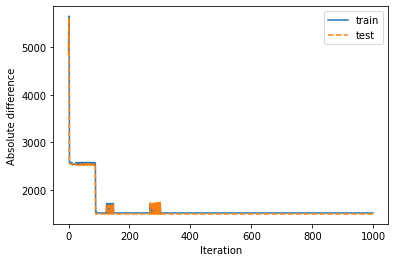

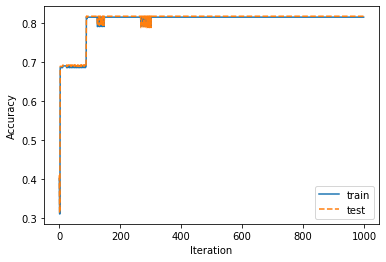

In [ ]:
np.random.seed(0) #Setting seed for reproducibility
wh = np.random.randn(Nh, Ni);
dwh = np.zeros(wh.shape)
np.random.seed(0) #Setting seed for reproducibility
wo = np.random.randn(No, Nh);
dwo = np.zeros(wo.shape)

error_train = np.array([])
error_test = np.array([])

for trial in range(Ntrails):
  #with sigmoid activation function
  h = 1/(1+np.exp(-wh@X)) #hidden activation for all pattern
  h_test=1/(1+np.exp(-wh@X_test))
  y = 1/(1+np.exp(-wo@h)) #output for all pattern
  y_test=1/(1+np.exp(-wo@h_test))  #test output for all pattern

  do = y*(1-y)*(Y-y)  # delta output
  dh = h*(1-h)*(wo.transpose()@do) # delta backpropagated  

  # update weights with momentum
  dwo = 0.9*dwo+0.1*do@h.T + 2*Lambda*wo
  wo = wo+alpha*dwo

  dwh = 0.9*dwh+0.1*dh@X.T + 2*Lambda*wh
  wh = wh+alpha*dwh

  # L2 Regularization
  Regularization = (Lambda/2) * (np.sum(np.square(wo)) + np.sum(np.square(wh)))

  wh = wh*Regularization

  cost1 = np.sum(abs(Y-y))/2  #absolute
  cost2 = np.sum((Y-y)**2)/2  #mean-squared

  error_train = np.append(error_train, np.sum(cost1 + Regularization)
  error_test = np.append(error_test, np.sum(cost2 + Regularization)

# print(np.round(y))
# print(np.round(y_test))

accuracy_train = (y.size-error_train)/y.size
accuracy_test = (y.size-error_test)/y_test.size
# print(accuracy_train)
# print(accuracy_test)

plt.figure(1)
plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error_train)
plt.plot(error_test,'--')
plt.legend(['train', 'test'], loc='upper right')

plt.figure(2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(accuracy_train)
plt.plot(accuracy_test,'--')
plt.legend(['train', 'test'], loc='lower right')

In [ ]:
import cv2
from keras.layers import GaussianNoise

In [ ]:
x_test_noise = cv2.GaussianBlur(X_test,(5,5), 0)

h_test_noise = 1/(1+np.exp(-wh@x_test_noise))
y_test_noise = 1/(1+np.exp(-wo@h_test_noise))

err_noise = np.sum(abs(y_test_ascii_bin-y_test_noise))

noise_accuracy = np.sum(np.all(y_test_ascii_bin == np.round(y_test_noise)), axis=0)
noise_accuracy = ((noise_accuracy/train_n))*100;
print(err_noise)
print(noise_accuracy)

1803.9257812499998
0.0
